In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import SimpleITK as sitk
import tifffile as tf

In [3]:
from ARA_stuff.parse_ara import *

In [4]:
from scipy.ndimage import gaussian_filter

In [28]:
# read in atlas
atlas = sitk.GetArrayFromImage(sitk.ReadImage('../registration/atlases/average_template_50.nrrd'))
labels = sitk.GetArrayFromImage(sitk.ReadImage('../registration/atlases/annotation_50.nrrd'))

In [6]:
atlas.min(), atlas.max()

(0, 516)

<IPython.core.display.Javascript object>


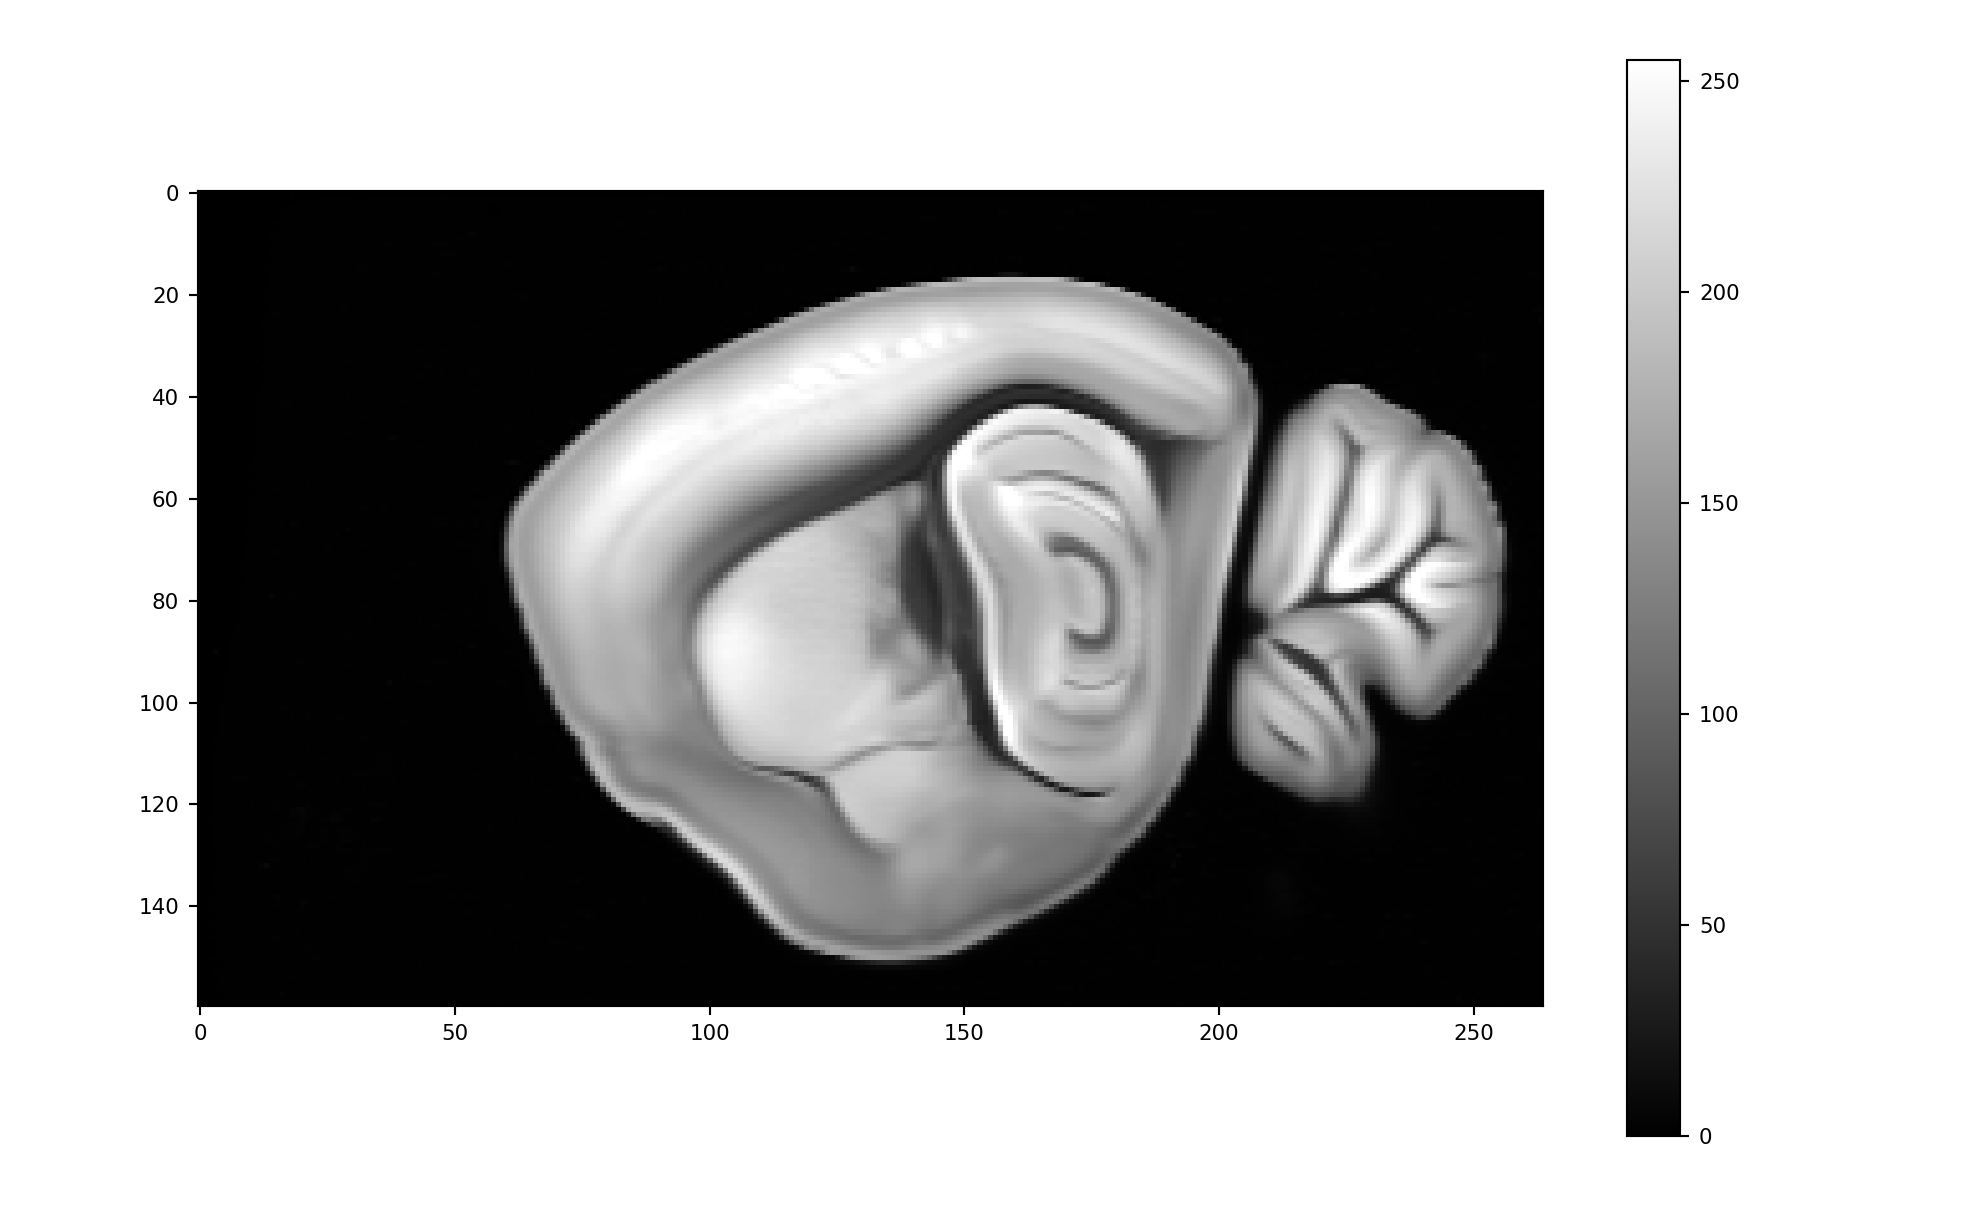

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x12401c370>)

In [7]:
tf.imshow(atlas[50,:,:], cmap='gray', vmax=255)

<IPython.core.display.Javascript object>


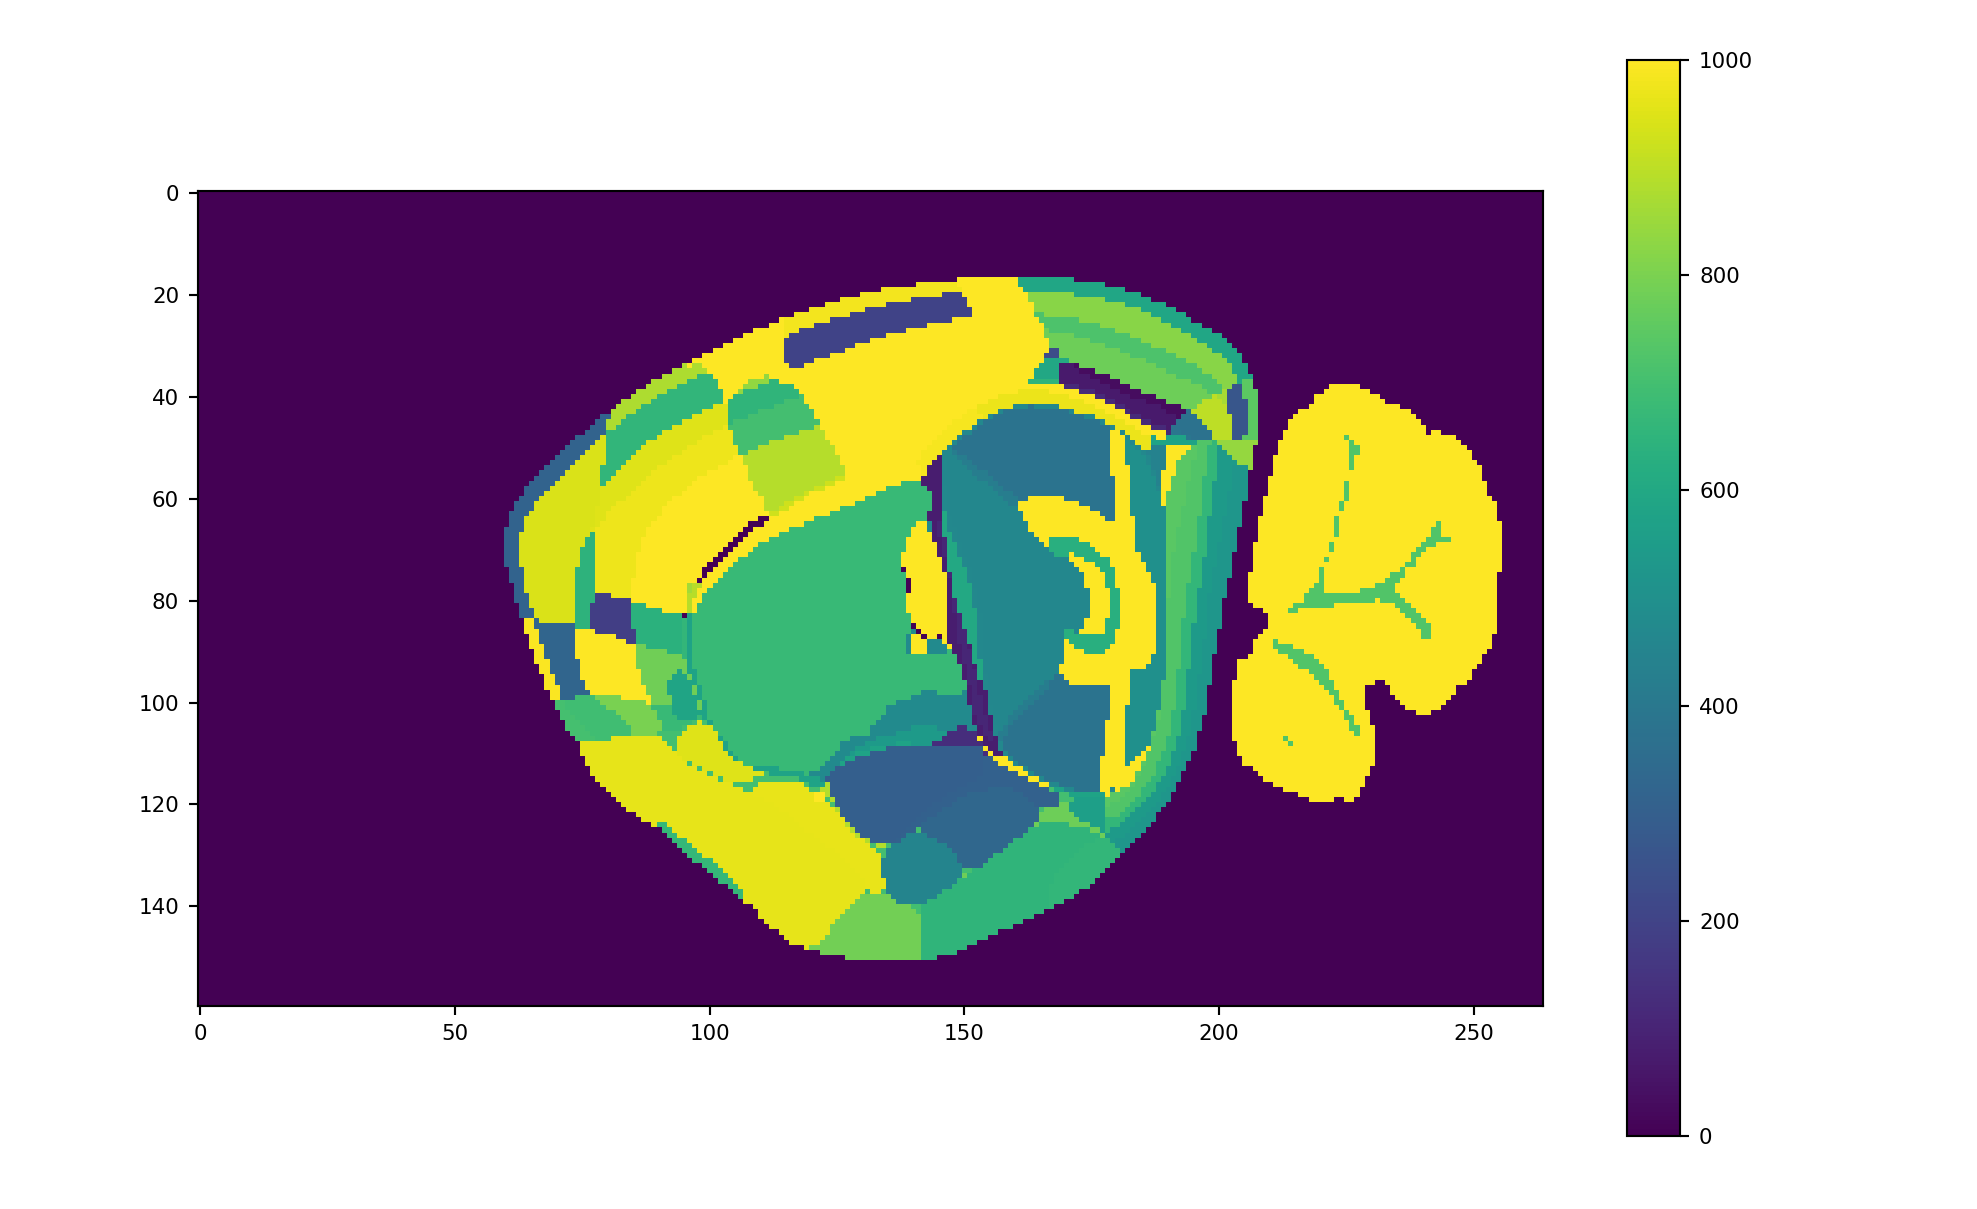

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x1243437f0>)

In [8]:
tf.imshow(labels[50,:,:], vmax=1000)

In [9]:
path_to_ontology = './ARA_stuff/ara_ontology.json'
with open(path_to_ontology,'r') as fp:
        f = json.load(fp)
        tree = build_tree(f)

In [10]:
level1_nodes = []
get_nodes_at_level(1, tree, level1_nodes)

In [11]:
for i in level1_nodes:
    print(i.name)

Basic cell groups and regions
fiber tracts
ventricular systems
grooves
retina


In [12]:
level1 = get_children_dict(path_to_ontology, level=1)

In [15]:
idx = np.isin(labels, level1[level1_nodes[1].id])
mask = (idx > 0) * 2
mask[ ~idx ] = 1.0

<IPython.core.display.Javascript object>


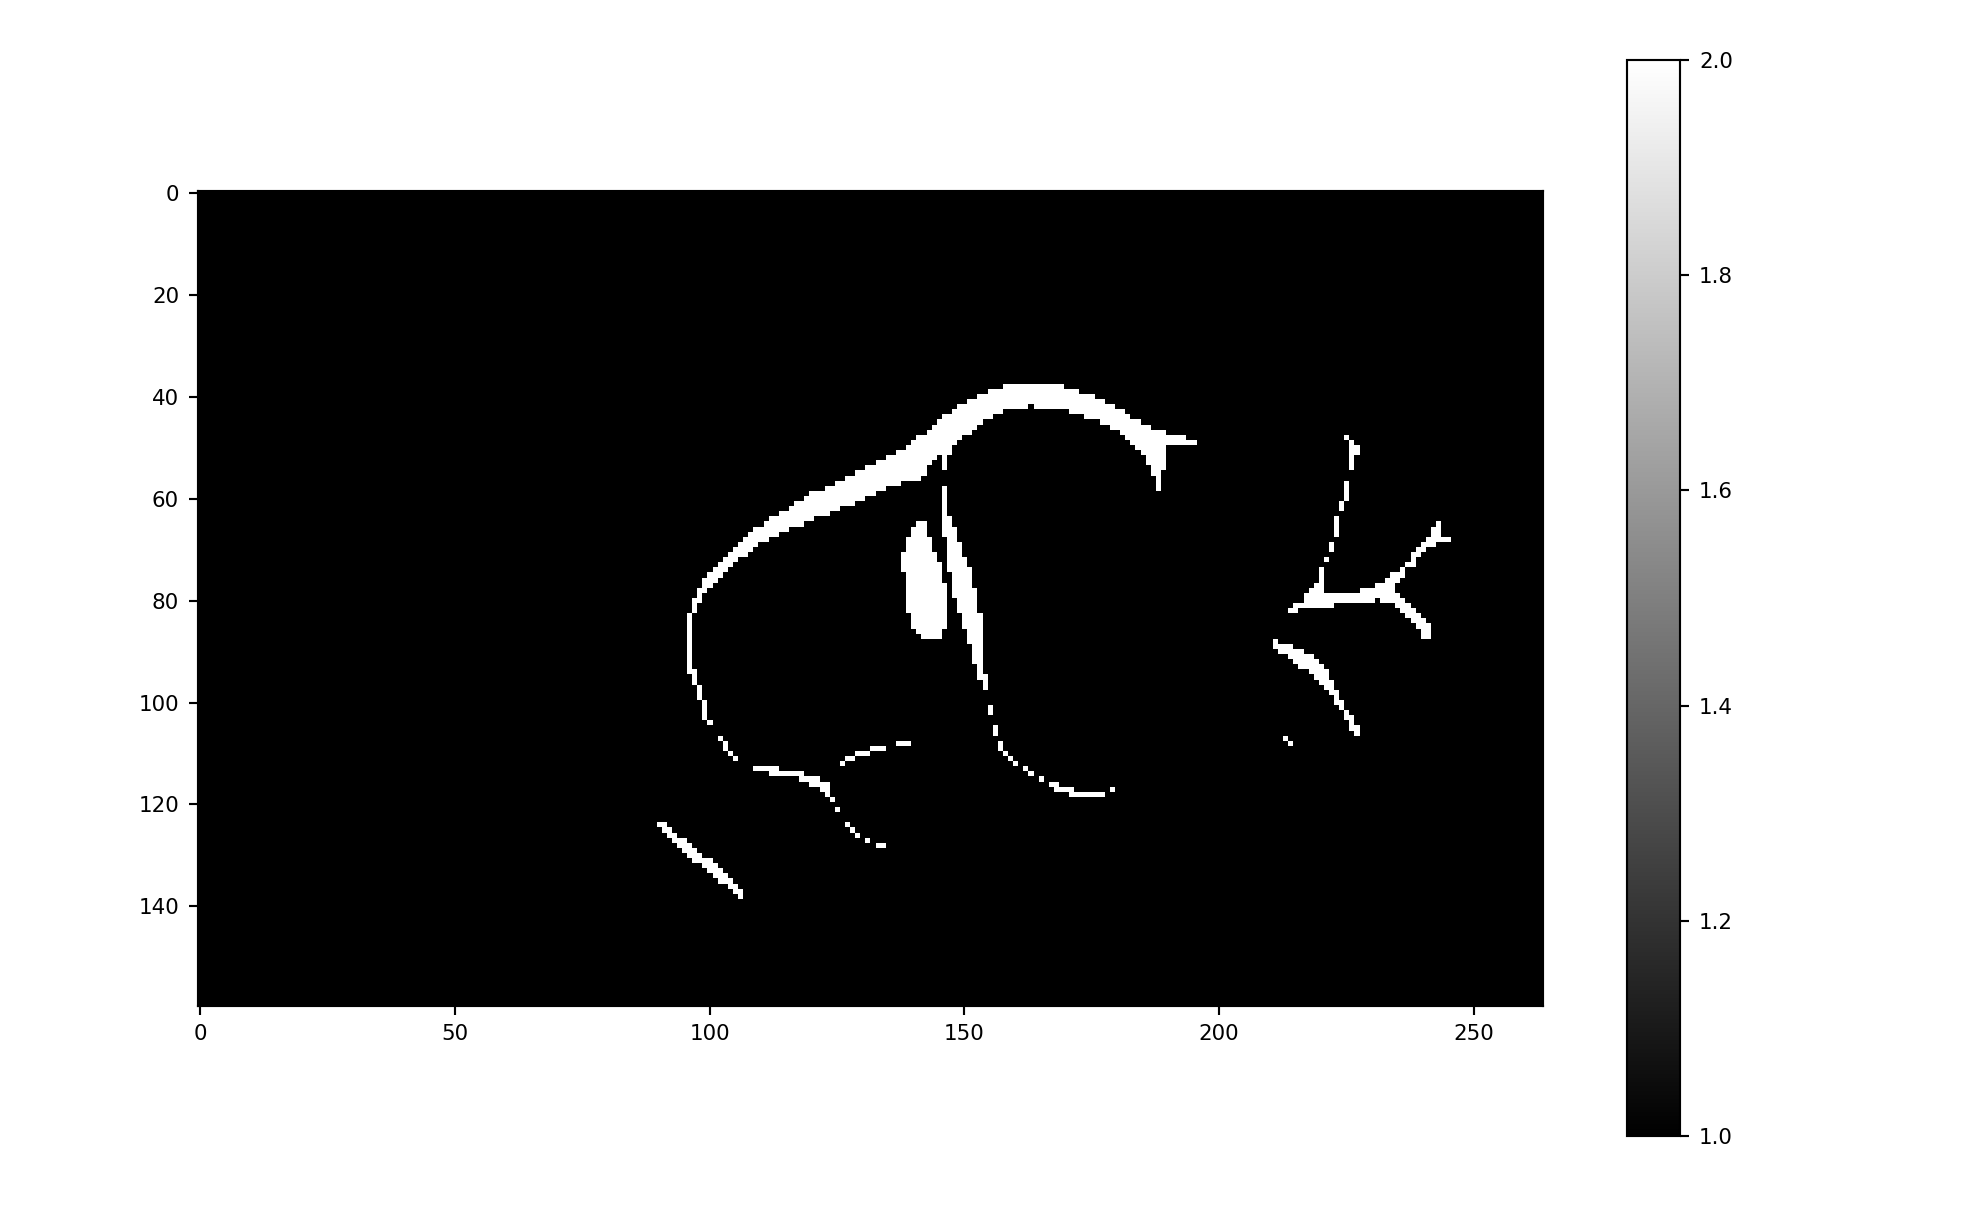

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x1245eeeb0>)

In [16]:
tf.imshow(mask[50,:,:], cmap='gray')

In [19]:
blurred_mask = gaussian_filter(mask.astype('float'),sigma=3)

<IPython.core.display.Javascript object>


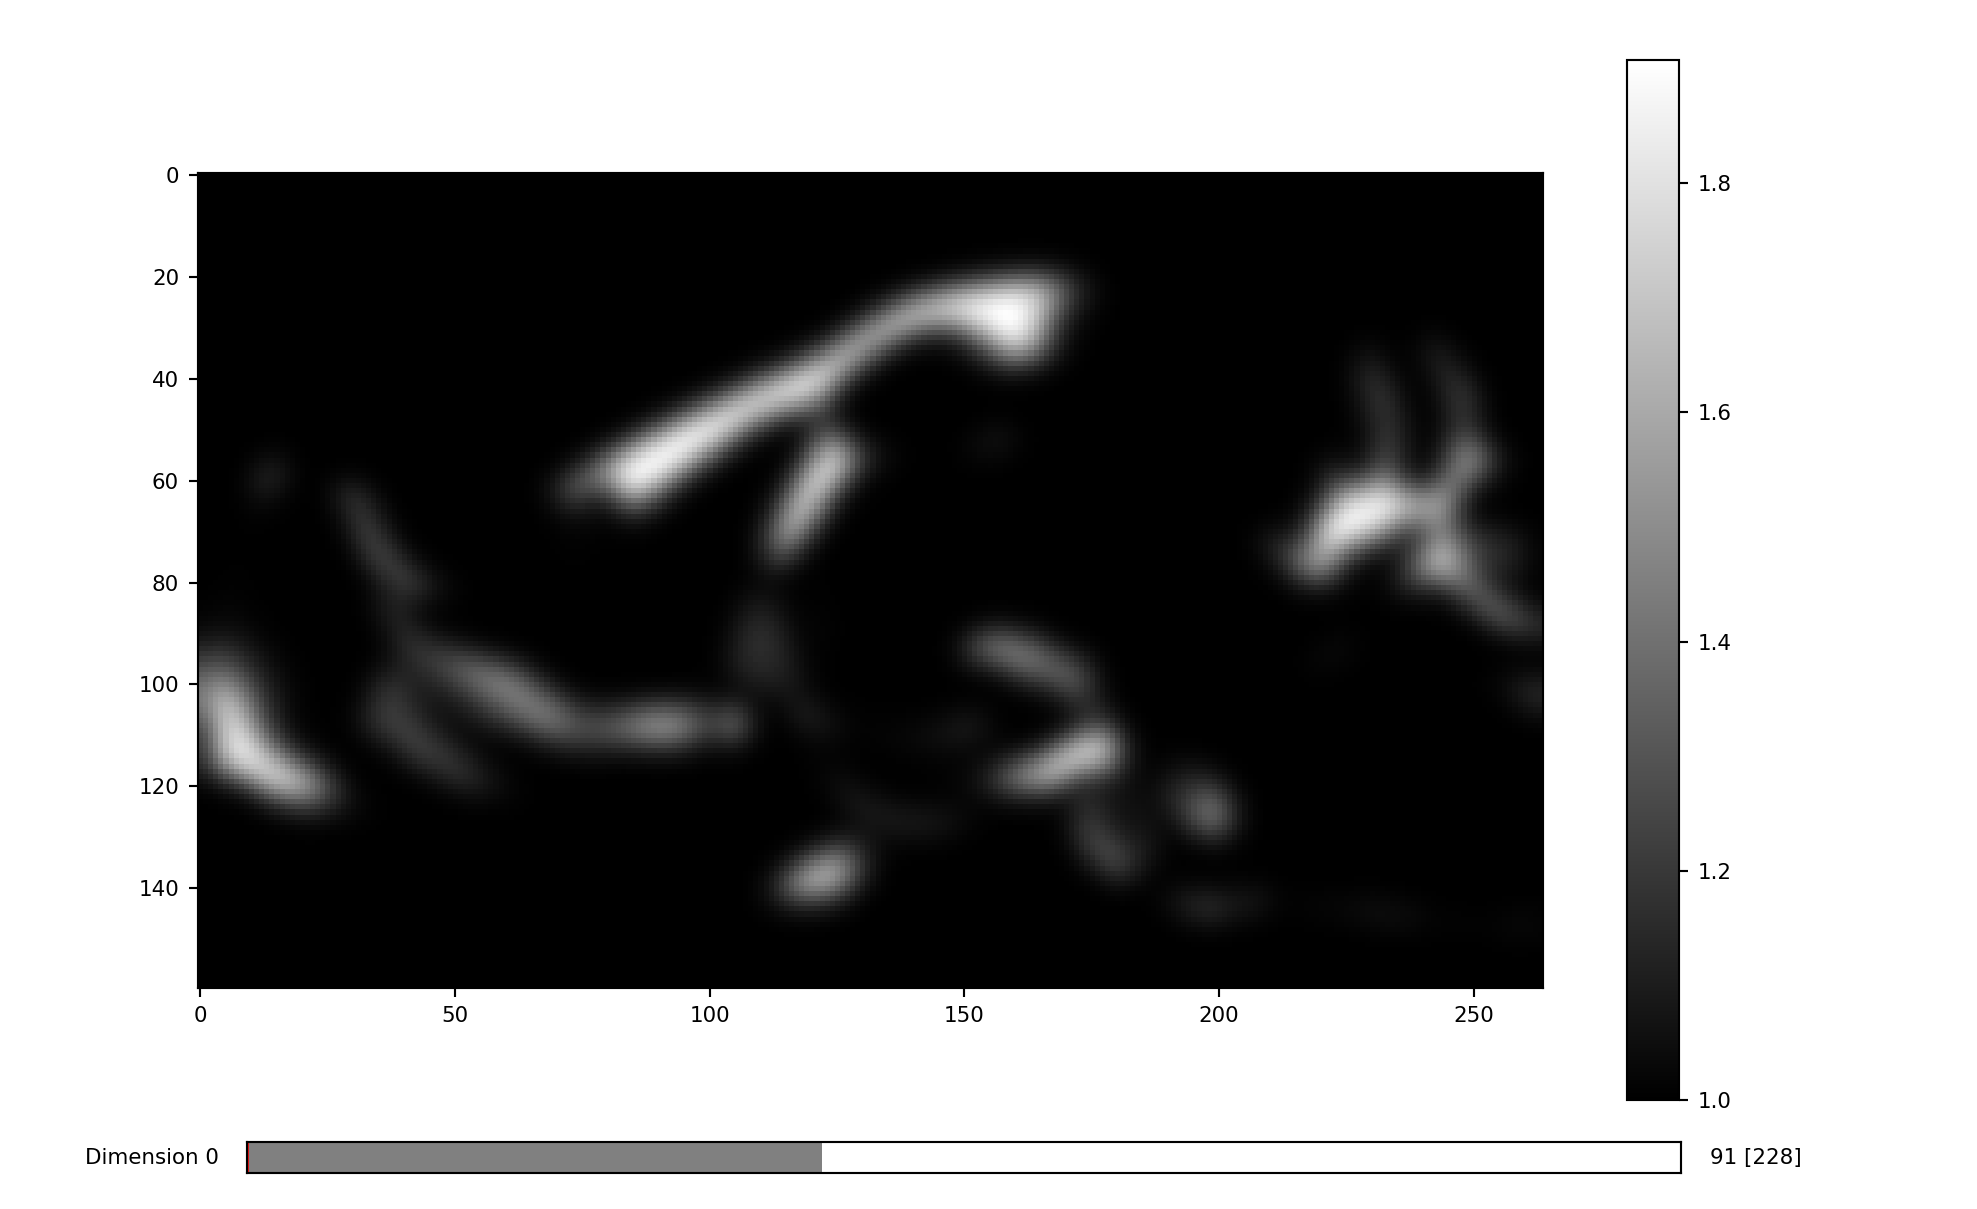

(<Figure size 988.8x604.8 with 3 Axes>,
 <matplotlib.image.AxesImage at 0x12476dfd0>)

In [20]:
tf.imshow(blurred_mask, cmap='gray')

In [24]:
atlas = blurred_mask * atlas

<IPython.core.display.Javascript object>


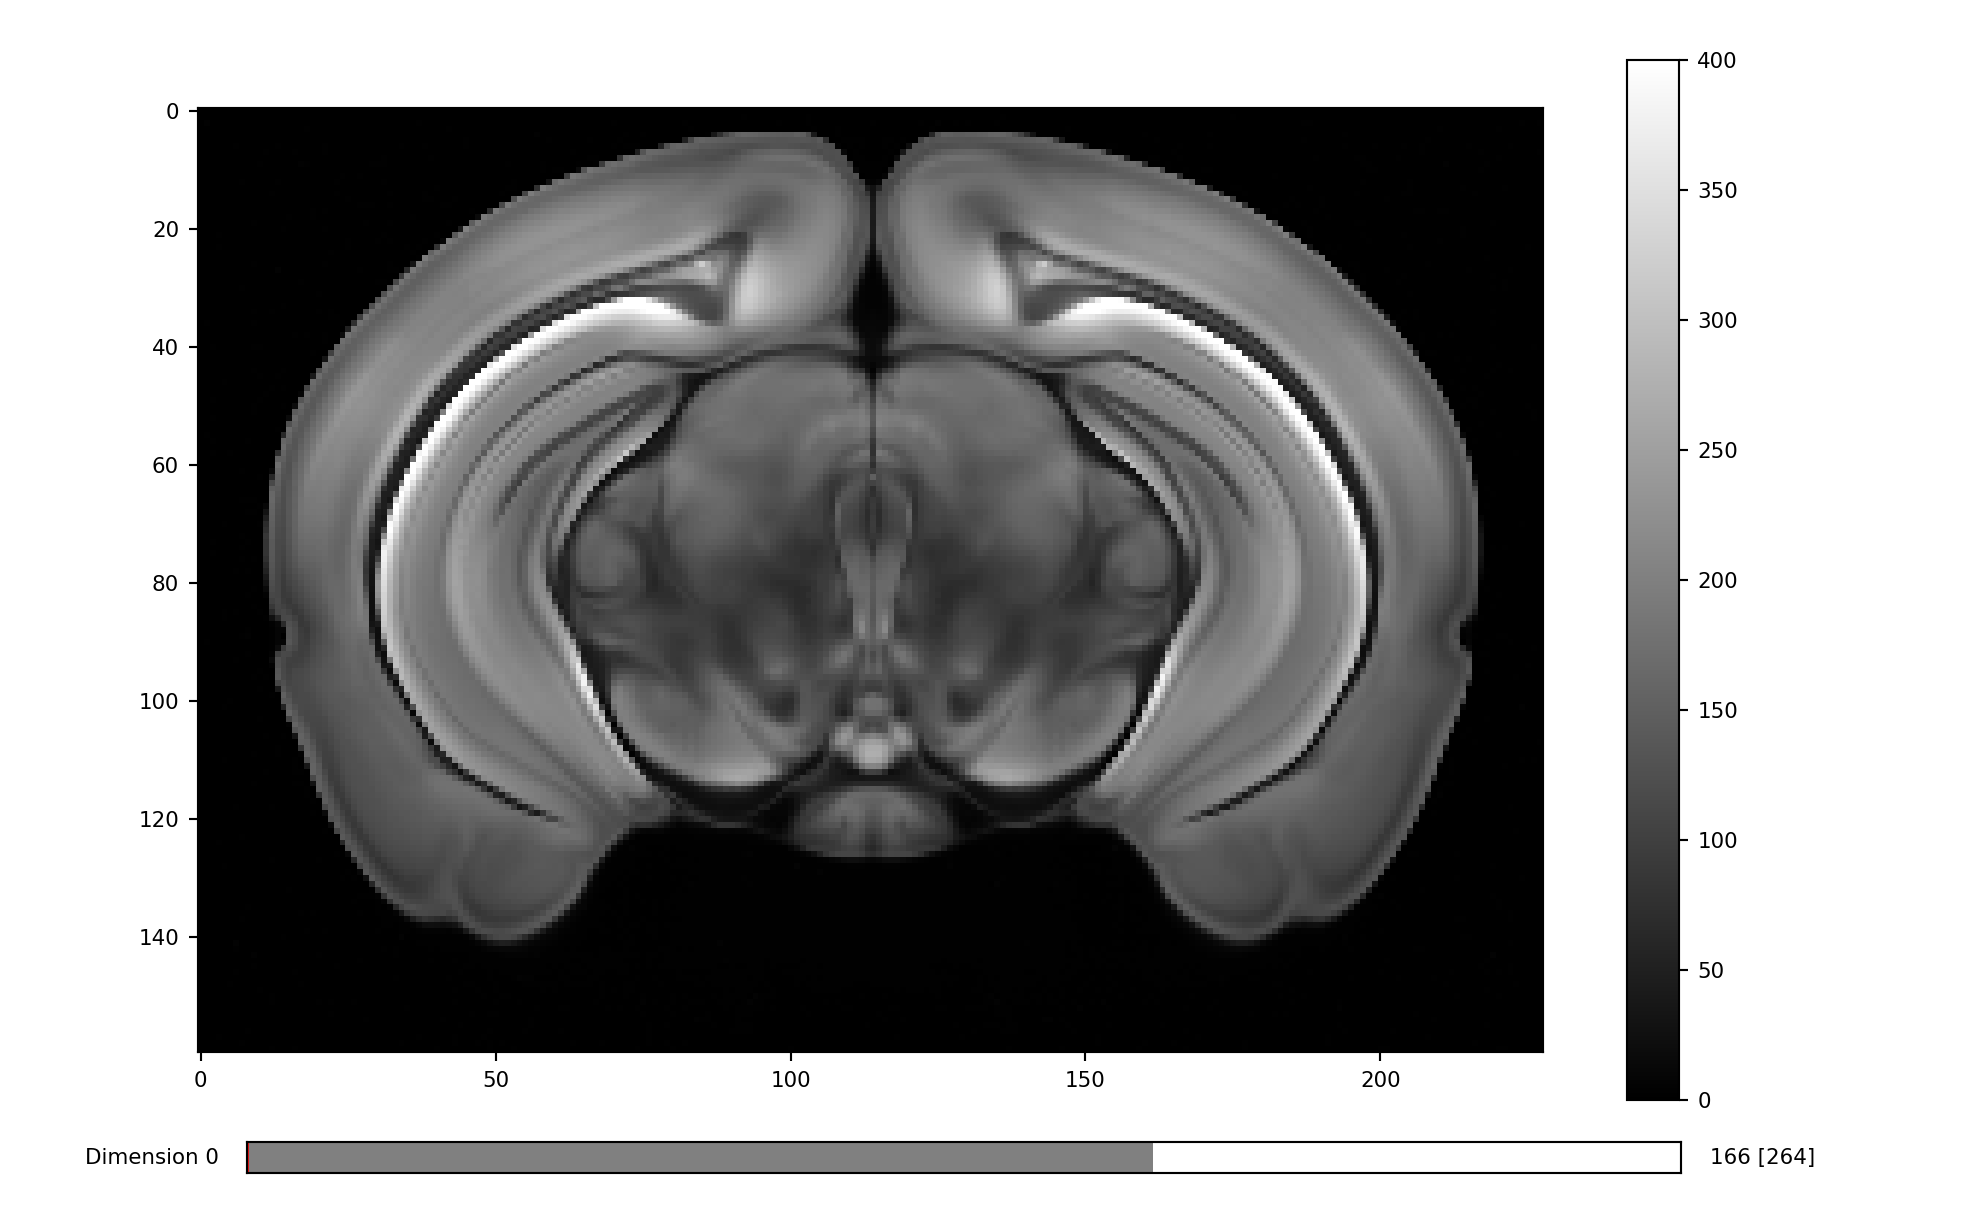

(<Figure size 988.8x604.8 with 3 Axes>,
 <matplotlib.image.AxesImage at 0x124b5c5b0>)

In [27]:
tf.imshow(atlas.T, cmap='gray', vmax=400)